In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')


In [43]:
data=pd.read_csv('data.csv',header=None)
print(data)

            0           1
0   32.502345   31.707006
1   53.426804   68.777596
2   61.530358   62.562382
3   47.475640   71.546632
4   59.813208   87.230925
5   55.142188   78.211518
6   52.211797   79.641973
7   39.299567   59.171489
8   48.105042   75.331242
9   52.550014   71.300880
10  45.419730   55.165677
11  54.351635   82.478847
12  44.164049   62.008923
13  58.168471   75.392870
14  56.727208   81.436192
15  48.955889   60.723602
16  44.687196   82.892504
17  60.297327   97.379897
18  45.618644   48.847153
19  38.816818   56.877213
20  66.189817   83.878565
21  65.416052  118.591217
22  47.481209   57.251819
23  41.575643   51.391744
24  51.845187   75.380652
25  59.370822   74.765564
26  57.310003   95.455053
27  63.615561   95.229366
28  46.737619   79.052406
29  50.556760   83.432071
..        ...         ...
70  31.588117   50.392670
71  53.660932   63.642399
72  46.682229   72.247251
73  43.107820   57.812513
74  70.346076  104.257102
75  44.492856   86.642020
76  57.50453

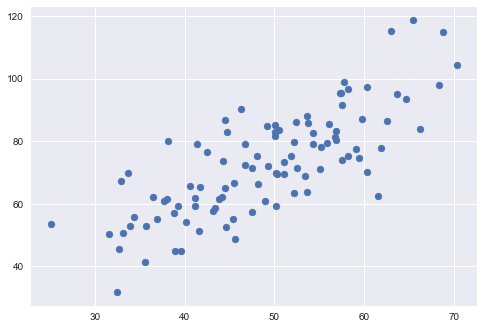

(100,)


In [44]:
x_data=data.iloc[:,0]
y_data=data.iloc[:,1]
plt.scatter(x_data,y_data)
plt.show()
print(x_data.shape)

In [59]:
data=data.values
def zeroMean(dataMat):
    meanVal=np.mean(dataMat,axis=0)
    newdata=dataMat-meanVal
    return newdata,meanVal

In [60]:
newdata,meanVal=zeroMean(data)
#求协方差矩阵，rowvar=0说明数据一行代表一个样本
covMat=np.cov(newdata,rowvar=0)

In [61]:
#求矩阵特征值和特征向量
eigVals,eigVects=np.linalg.eig(np.mat(covMat))

In [62]:
#特征值
eigVals

array([ 30.97826888, 341.50884814])

In [63]:
#特征向量
eigVects

matrix([[-0.89098665, -0.45402951],
        [ 0.45402951, -0.89098665]])

In [64]:
#对特征值从小到大排序
eigValIndice=np.argsort(-eigVals)
eigValIndice

array([1, 0], dtype=int64)

In [65]:
#选取最大的top个特征值的下标
top=1#降成维度
n_eigValIndice=eigValIndice[:top]

In [66]:
n_eigValIndice

array([1], dtype=int64)

In [67]:
#最大的n个特征值对应的特征向量
n_eigVect=eigVects[:,n_eigValIndice]
n_eigVect

matrix([[-0.45402951],
        [-0.89098665]])

In [69]:

lowDDataMat=newdata*n_eigVect
lowDDataMat

matrix([[ 44.02694787],
        [  1.49722533],
        [  3.35564513],
        [  1.73205523],
        [-17.84406034],
        [ -7.68710859],
        [ -7.6311404 ],
        [ 16.4703207 ],
        [ -1.92574891],
        [ -0.35289859],
        [ 17.26071108],
        [-11.13030667],
        [ 11.73358623],
        [ -6.54975245],
        [-11.27989566],
        [ 10.70315359],
        [ -7.11092921],
        [-27.10646295],
        [ 22.80011879],
        [ 18.73367246],
        [-17.75232043],
        [-48.32951839],
        [ 14.46601408],
        [ 22.36856421],
        [ -3.66790828],
        [ -6.5367338 ],
        [-24.03511973],
        [-26.696945  ],
        [ -4.62040617],
        [-10.25663202],
        [  6.87141913],
        [ 33.98731832],
        [ -0.49795028],
        [-25.59431857],
        [ -5.08219623],
        [  7.07400117],
        [-10.3589004 ],
        [ 26.81843789],
        [ 15.13930397],
        [ 15.74751369],
        [ 19.86509486],
        [ 15.181

In [58]:
#重构

In [70]:
reconMat=(lowDDataMat*n_eigVect.T)+meanVal
reconMat

matrix([[ 28.96880808,  33.50762783],
        [ 48.27855698,  71.40104277],
        [ 47.43477956,  69.74521555],
        [ 48.17193728,  71.19181247],
        [ 57.06007136,  88.63387007],
        [ 52.44851558,  79.58416168],
        [ 52.42310436,  79.53429476],
        [ 41.4803299 ,  58.06021471],
        [ 49.83268829,  74.45086712],
        [ 49.11856784,  73.04947849],
        [ 41.12146934,  57.35598744],
        [ 54.0118291 ,  82.65200519],
        [ 43.6309471 ,  62.28058188],
        [ 51.93212233,  78.57079254],
        [ 54.07974691,  82.78528698],
        [ 44.09879393,  63.19868361],
        [ 52.18691313,  79.07079354],
        [ 61.26547544,  96.88654713],
        [ 38.6064148 ,  52.42044913],
        [ 40.45270141,  56.04359851],
        [ 57.01841873,  88.55213104],
        [ 70.90136881, 115.79600617],
        [ 42.39034424,  59.84602515],
        [ 38.80235331,  52.80495849],
        [ 50.62368004,  76.00310786],
        [ 51.92621148,  78.55919309],
        [ 59

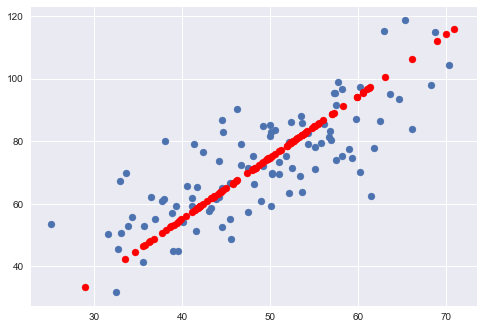

In [72]:
x_data=data[:,0]
y_data=data[:,1]
plt.scatter(x_data,y_data)
x_data=np.array(reconMat)[:,0]
y_data=np.array(reconMat)[:,1]
plt.scatter(x_data,y_data,c='r')
plt.show()